In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
df = pd.read_csv("creditcard.csv")
#Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have
#not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between
#each transaction and the first transaction in the dataset.

In [3]:
df.rename(columns = {'Class':'isFraud'}, inplace = True) 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['isFraud'].value_counts()

0    284315
1       492
Name: isFraud, dtype: int64

(array([2.62369e+05, 1.31640e+04, 4.02500e+03, 1.96100e+03, 9.64000e+02,
        5.68000e+02, 3.64000e+02, 2.62000e+02, 1.23000e+02, 1.03000e+02,
        8.50000e+01, 5.90000e+01, 4.50000e+01, 4.70000e+01, 3.80000e+01,
        3.10000e+01, 2.20000e+01, 1.10000e+01, 1.40000e+01, 8.00000e+00,
        7.00000e+00, 3.00000e+00, 6.00000e+00, 5.00000e+00, 1.00000e+00,
        4.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00, 3.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

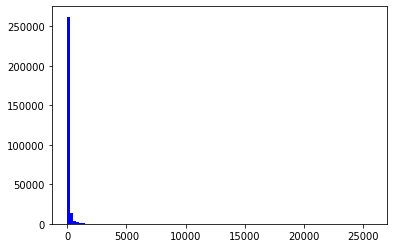

In [5]:
import matplotlib.pyplot as plt
plt.hist(df[df.isFraud == False]['Amount'], color='b', label='Real', bins=100)

(array([230.,  27.,  14.,   5.,  12.,   8.,   9.,   4.,   5.,   2.,   3.,
          6.,   3.,   5.,  38.,   7.,   3.,   5.,   3.,   1.,   3.,   1.,
          1.,   0.,   4.,   2.,   5.,   1.,   1.,   2.,   0.,   1.,   1.,
          4.,   2.,   3.,   2.,   0.,   3.,   0.,   1.,   2.,   0.,   2.,
          4.,   5.,   0.,   1.,   2.,   1.,   3.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.,   3.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

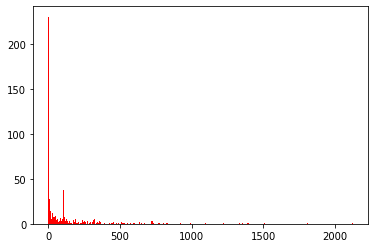

In [6]:
plt.hist(df[df.isFraud == True]['Amount'], color='r', label='Fraud', bins=300)

##### clean data and generate train & test sets

In [7]:
def norm(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [8]:
from sklearn.model_selection  import train_test_split
X, y = df.iloc[:,:-1], df.iloc[:, -1]
y_numeric = y
y = keras.utils.to_categorical(y, num_classes=2) #one-hot encoded for use with categorial cross entropy loss

X_orig = X
X = norm(X) #normalize the data to N(0,1)
###UNFINISHED MAYBE WE SHOULDNT NORMALIZXE THE PCA FEATURE COLS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#corresponding for resampling methods (we need to use different datatype)
y_num_train = y_numeric[X_train.index]
y_num_test = y_numeric[X_test.index]

##### Sampling Methods : SMOTE (oversampling) & nearmiss (undersampling)

In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_num_train)



SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.



In [10]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

X_train_miss, y_train_miss = nr.fit_sample(X_train, y_num_train) 

##### Creating our Loss functions: Focal Loss & Asymmetric Loss

In [11]:
import tensorflow as tf

In [12]:

# focal loss method, source: https://github.com/Tony607/Focal_Loss_Keras

class FocalLoss(keras.losses.Loss):
    def __init__(self, gamma=2., alpha=4.,
                 reduction=keras.losses.Reduction.AUTO, name='focal_loss'):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})
        """
        super(FocalLoss, self).__init__(reduction=reduction,
                                        name=name)
        self.gamma = float(gamma)
        self.alpha = float(alpha)

    def call(self, y_true, y_pred):
        """
        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.math.log(model_out))
        weight = tf.multiply(y_true, tf.pow(
            tf.subtract(1., model_out), self.gamma))
        fl = tf.multiply(self.alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)


In [13]:
#asymmetric loss
#https://github.com/keras-team/keras/issues/2115
import tensorflow.keras.backend as K
from tensorflow.keras.losses import CategoricalCrossentropy


class WeightedCategoricalCrossentropy(CategoricalCrossentropy):
    
    def __init__(self, cost_mat, name='weighted_categorical_crossentropy', **kwargs):
        assert cost_mat.ndim == 2
        assert cost_mat.shape[0] == cost_mat.shape[1]
        
        super().__init__(name=name, **kwargs)
        self.cost_mat = K.cast_to_floatx(cost_mat)
    
    def __call__(self, y_true, y_pred, sample_weight=None):
        assert sample_weight is None, "should only be derived from the cost matrix"
      
        return super().__call__(
            y_true=y_true,
            y_pred=y_pred,
            sample_weight=get_sample_weights(y_true, y_pred, self.cost_mat),
        )
    
#class CashCrossentropy(CategoricalCrossentropy):
#    
#    def __init__(self, cost_mat, name='weighted_categorical_crossentropy', **kwargs):
#        assert cost_mat.ndim == 2
#        assert cost_mat.shape[0] == cost_mat.shape[1]
#        
#        super().__init__(name=name, **kwargs)
#        self.cost_mat = K.cast_to_floatx(cost_mat)
#    
#    def __call__(self, y_true, y_pred, sample_weight=None):
#        # assert sample_weight is None, "should only be derived from the cost matrix"
#        
#        return super().__call__(
#            y_true=y_true,
#            y_pred=y_pred,
#            sample_weight=get_sample_weights(y_true, y_pred, self.cost_mat) * K.cast_to_floatx(sample_weight),
#        )


def get_sample_weights(y_true, y_pred, cost_m):
    num_classes = len(cost_m)

    y_pred.shape.assert_has_rank(2)
    y_pred.shape[1:].assert_is_compatible_with(num_classes)
    y_pred.shape.assert_is_compatible_with(y_true.shape)

    y_pred = K.one_hot(K.argmax(y_pred), num_classes)

    y_true_nk1 = K.expand_dims(y_true, 2)
    y_pred_n1k = K.expand_dims(y_pred, 1)
    cost_m_1kk = K.expand_dims(cost_m, 0)

    sample_weights_nkk = cost_m_1kk * y_true_nk1 * y_pred_n1k
    sample_weights_n = K.sum(sample_weights_nkk, axis=[1, 2])

    return sample_weights_n

##### build our neural network model, create different instances for each method to benchmark

In [14]:
from tensorflow.keras.models import Sequential

mod_focal = Sequential()

from tensorflow.keras.layers import Dense

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

#general CNN model.
###DECIDE WHAT KIND CNN TO BUILD###UNFINISHED
mod_focal.add(Dense(10, input_dim=input_dim, activation='relu', name='input'))
mod_focal.add(Dense(20, activation='relu', name='fc1'))
mod_focal.add(Dense(10, activation='relu', name='fc2'))
mod_focal.add(Dense(nb_classes, activation='softmax', name='output'))

In [15]:
#loss models
mod_ce_acc = tf.keras.models.clone_model(mod_focal)
mod_ce_bal_weight = tf.keras.models.clone_model(mod_focal) #UNFINISHED probably jsut delete it doesnt work.
mod_ce_bal= tf.keras.models.clone_model(mod_focal) #asymmetric cost
mod_ce_weight = tf.keras.models.clone_model(mod_focal) #weighted based on cost

#resampling models
mod_SMOTE = tf.keras.models.clone_model(mod_focal)
mod_nearmiss = tf.keras.models.clone_model(mod_focal)

In [52]:
#define common terms for compiling models
ourmetrics=['accuracy','AUC','Recall',tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(), tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()]
opt= "sgd"

In [60]:
#compile the models

mod_focal.compile(loss=FocalLoss(alpha=1),
              optimizer=opt,
              metrics=ourmetrics)

mod_ce_acc.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=ourmetrics)

mod_ce_weight.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=ourmetrics)

mod_SMOTE.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=ourmetrics)

mod_nearmiss.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=ourmetrics)


#define matrix for Aysmmetric
w_array = np.ones((2,2))
w_array[1,0] = 4


mod_ce_bal.compile(loss=WeightedCategoricalCrossentropy(w_array),
              optimizer=opt,
              metrics=ourmetrics)

#mod_ce_bal_weight.compile(loss=CashCrossentropy(w_array),
#              optimizer=opt,
#              metrics=ourmetrics)


In [61]:
#set up callbacks

import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

##### train our models

In [62]:
#define our universal fitting params
nb_batch = 1000
nb_epoch = 8

In [63]:
time_focal = TimeHistory()
hist_focal = mod_focal.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_focal]) #fit model

Epoch 1/8
228/228 [==============================] - 1s 5ms/step - loss: 0.0020 - accuracy: 0.9989 - auc: 0.9996 - recall: 0.9989 - false_positives_1: 483.0000 - false_negatives: 483.0000 - true_positives: 455207.0000 - true_negatives: 455207.0000
Epoch 2/8
228/228 [==============================] - 1s 6ms/step - loss: 0.0020 - accuracy: 0.9989 - auc: 0.9996 - recall: 0.9989 - false_positives_1: 242.0000 - false_negatives: 242.0000 - true_positives: 227603.0000 - true_negatives: 227603.0000
Epoch 3/8
228/228 [==============================] - 1s 6ms/step - loss: 0.0020 - accuracy: 0.9990 - auc: 0.9996 - recall: 0.9990 - false_positives_1: 238.0000 - false_negatives: 238.0000 - true_positives: 227607.0000 - true_negatives: 227607.0000
Epoch 4/8
228/228 [==============================] - 1s 5ms/step - loss: 0.0019 - accuracy: 0.9990 - auc: 0.9996 - recall: 0.9990 - false_positives_1: 237.0000 - false_negatives: 237.0000 - true_positives: 227608.0000 - true_negatives: 227608.0000
Epoch 5/

In [64]:
mod_ce_acc.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_focal])

Epoch 1/8
228/228 [==============================] - 1s 6ms/step - loss: 0.0116 - accuracy: 0.9982 - auc: 0.9994 - recall: 0.9982 - false_positives_1: 633.0000 - false_negatives: 633.0000 - true_positives: 455057.0000 - true_negatives: 455057.0000
Epoch 2/8
228/228 [==============================] - 2s 7ms/step - loss: 0.0110 - accuracy: 0.9982 - auc: 0.9995 - recall: 0.9982 - false_positives_1: 405.0000 - false_negatives: 405.0000 - true_positives: 227440.0000 - true_negatives: 227440.0000
Epoch 3/8
228/228 [==============================] - 2s 8ms/step - loss: 0.0105 - accuracy: 0.9982 - auc: 0.9995 - recall: 0.9982 - false_positives_1: 405.0000 - false_negatives: 405.0000 - true_positives: 227440.0000 - true_negatives: 227440.0000
Epoch 4/8
228/228 [==============================] - 2s 7ms/step - loss: 0.0100 - accuracy: 0.9982 - auc: 0.9995 - recall: 0.9982 - false_positives_1: 405.0000 - false_negatives: 405.0000 - true_positives: 227440.0000 - true_negatives: 227440.0000
Epoch 5/

In [65]:
mod_nearmiss.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_focal])

Epoch 1/8
228/228 [==============================] - 1s 5ms/step - loss: 0.0167 - accuracy: 0.9982 - auc: 0.9986 - recall: 0.9982 - false_positives_1: 789.0000 - false_negatives: 789.0000 - true_positives: 454901.0000 - true_negatives: 454901.0000
Epoch 2/8
228/228 [==============================] - 1s 5ms/step - loss: 0.0157 - accuracy: 0.9982 - auc: 0.9988 - recall: 0.9982 - false_positives_1: 405.0000 - false_negatives: 405.0000 - true_positives: 227440.0000 - true_negatives: 227440.0000
Epoch 3/8
228/228 [==============================] - 1s 5ms/step - loss: 0.0149 - accuracy: 0.9982 - auc: 0.9989 - recall: 0.9982 - false_positives_1: 405.0000 - false_negatives: 405.0000 - true_positives: 227440.0000 - true_negatives: 227440.0000
Epoch 4/8
228/228 [==============================] - 1s 5ms/step - loss: 0.0143 - accuracy: 0.9982 - auc: 0.9990 - recall: 0.9982 - false_positives_1: 405.0000 - false_negatives: 405.0000 - true_positives: 227440.0000 - true_negatives: 227440.0000
Epoch 5/

In [66]:
mod_SMOTE.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_focal])

Epoch 1/8
228/228 [==============================] - 1s 5ms/step - loss: 0.0183 - accuracy: 0.9982 - auc: 0.9985 - recall: 0.9982 - false_positives_1: 810.0000 - false_negatives: 810.0000 - true_positives: 454880.0000 - true_negatives: 454880.0000
Epoch 2/8
228/228 [==============================] - 1s 5ms/step - loss: 0.0168 - accuracy: 0.9982 - auc: 0.9987 - recall: 0.9982 - false_positives_1: 405.0000 - false_negatives: 405.0000 - true_positives: 227440.0000 - true_negatives: 227440.0000
Epoch 3/8
228/228 [==============================] - 1s 6ms/step - loss: 0.0157 - accuracy: 0.9982 - auc: 0.9989 - recall: 0.9982 - false_positives_1: 405.0000 - false_negatives: 405.0000 - true_positives: 227440.0000 - true_negatives: 227440.0000
Epoch 4/8
228/228 [==============================] - 1s 5ms/step - loss: 0.0148 - accuracy: 0.9982 - auc: 0.9990 - recall: 0.9982 - false_positives_1: 405.0000 - false_negatives: 405.0000 - true_positives: 227440.0000 - true_negatives: 227440.0000
Epoch 5/

In [67]:
mod_ce_bal.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_focal])


Epoch 1/8
228/228 [==============================] - 2s 9ms/step - loss: 0.0189 - accuracy: 0.9990 - auc: 0.9996 - recall: 0.9990 - false_positives_1: 644.0000 - false_negatives: 644.0000 - true_positives: 455046.0000 - true_negatives: 455046.0000
Epoch 2/8
228/228 [==============================] - 2s 8ms/step - loss: 0.0177 - accuracy: 0.9990 - auc: 0.9996 - recall: 0.9990 - false_positives_1: 221.0000 - false_negatives: 221.0000 - true_positives: 227624.0000 - true_negatives: 227624.0000
Epoch 3/8
228/228 [==============================] - 2s 7ms/step - loss: 0.0168 - accuracy: 0.9991 - auc: 0.9996 - recall: 0.9991 - false_positives_1: 204.0000 - false_negatives: 204.0000 - true_positives: 227641.0000 - true_negatives: 227641.0000
Epoch 4/8
228/228 [==============================] - 2s 7ms/step - loss: 0.0160 - accuracy: 0.9991 - auc: 0.9996 - recall: 0.9991 - false_positives_1: 196.0000 - false_negatives: 196.0000 - true_positives: 227649.0000 - true_negatives: 227649.0000
Epoch 5/

In [68]:
#mod_ce_bal_weight.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch,
#                      sample_weight = ((X_train['Amount'] - min(X_train['Amount'])/max(X_train['Amount']))))

In [72]:
mod_ce_bal.compile(loss=WeightedCategoricalCrossentropy(w_array),
              optimizer=opt,
              metrics=['accuracy'])

mod_ce_weight.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_focal],
                      sample_weight = ((X_train['Amount'] - min(X_train['Amount'])/max(X_train['Amount']))))

Epoch 1/8


InvalidArgumentError:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (sequential/output/Softmax:0) = ] [[nan nan][nan...]...] [y (Cast_6/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/else/_1/assert_greater_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_167287]

Function call stack:
train_function


## evaluate our models.

In [ ]:
score = mod_focal.evaluate(X_test, y_test, batch_size=1000) #evaluate fit using ??? method.

In [ ]:
# TO DO: instead of confusion matrix, use the ML things they tend to use: accuracy, and th eother two.
#we are concerned with minimized false negatives!

In [ ]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
predictions = mod_focal.predict(X_test, batch_size=1000)

LABELS = ['Real','Fraud'] 

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [ ]:
values = confusion_matrix.view()
error_count = values.sum() - np.trace(values)
error_count

#### new metric: amount of money lost by company due to fraud. (assuming they reimburse all fraud cases)

In [ ]:
#number of fraud cases categorizes as real -> get the amount of money
X_temp = X_orig.iloc[X_test.index]['Amount']
total_monetary_loss = sum(X_temp[(max_test != max_predictions) & (max_test == 1)])
print("total monetary loss: " + str(total_monetary_loss))

In [ ]:
hist_focal.history

In [ ]:
#plots , https://wandb.ai/site/articles/plotting-keras-history
#https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

# Get training and test loss histories
training_loss = hist_focal.history['loss']
test_loss = hist_focal.history['accuracy']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
## Time

In [ ]:
temp = np.cumsum(time_focal.times)
plt.plot(test_loss,temp, 'r--')

In [ ]:
plt.plot(epoch_count,temp, 'r--')